## Исследование данных о российском кинопрокате
Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.


**Описание данных**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
pth1 = 'mkrf_movies.csv'
pth2 = '/datasets/mkrf_movies.csv'
pth3 = 'mkrf_shows.csv'
pth4 = '/datasets/mkrf_shows.csv'

In [3]:
if os.path.exists(pth1):
  df = pd.read_csv(pth1)
else:
  df = pd.read_csv(pth2)

In [4]:
if os.path.exists(pth3):
  df_2 = pd.read_csv(pth3)
else:
  df_2 = pd.read_csv(pth4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Изучив информацию об обоих датафреймах, выяснили, на основании какого столбца мы можем их объединить. Это столбец 'puNumber'. Но при попытке это сделать возникает ошибка из-за несоответствия типов данных этих столбцов. А при попытке изменить тип данных в первом датафрейме ошибка возникает из-за значений "нет" в этом столбце. Поэтому мы заменим эти значения на 0 и поменяем тип данных. Тогда мы сможем объединить эти таблицы. 

In [7]:
df.loc[df['puNumber'] == 'нет', 'puNumber'] = 0

In [8]:
df['puNumber'] = df['puNumber'].astype('int')

In [9]:
data = df.merge(df_2, on='puNumber', how='left')

In [10]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
pd.options.display.float_format = '{:,.2f}'.format

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Судя по представленной выше информации о таблице, необходимо преобразовать типы данных в столбцах "show_start_date" на datetime и "ratings" на float

In [13]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'], format='%Y-%m-%dT%H:%M:%S'
)

In [14]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [15]:
data['ratings'].loc[data['ratings'].str.find('%') != -1].count()

29

Среди нормальных значений рейтинга встречаются процентные значения, но их немного (29), поэтому мы приведем этот столбец к числовому типу, но эти значения станут пропусками

In [16]:
data['ratings'].isna().sum()

967

In [17]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [18]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [19]:
data['ratings'].isna().sum() #пропусков стало больше

996

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
data.isna().mean()

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

Наибольшее количество пропусков в столбцах "объём возвратных средств государственной поддержки", "объём невозвратных средств государственной поддержки", "источник государственного финансирования", "общий бюджет фильма". Это значит, что из всей базы данных только около 5% фильмов получили государственную поддержку. Мы не можем заполнить эти пропуски. 

Также много пропусков в столбце "сборы в рублях". Как я понимаю, кассовые сборы формируются из денег, полученных с продажи билетов на эти фильмы. Пропуски можно объяснить либо тем, что эти фильмы не были в прокате в кинотеатрах, либо, что нет данных о сборах конкретно в рублях.

В остальных столбцах доля пропусков незначительна, но чтобы их заполнить, нужно также располагать информацией об этих фильмах. 

Заполним пропуски в столбцах "режиссер" и "жанр" значением "неизвестно", так как это необходимо для дальнейшего исследования.

In [21]:
data['director'] = data['director'].fillna('неизвестно')
data['genres'] = data['genres'].fillna('неизвестно')

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
data.duplicated().sum()

0

In [23]:
data[data['puNumber'].duplicated(keep=False) == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


В столбце "Номер прокатного удостоверения" есть 2 дубликата.

В первом случае это разные фильмы с совпадающими номерами удостоверений, выданных в один день. Возможно, это ошибка. Я бы не стала удалять эту строку.

Во втором случае это один и тот же фильм, с опечаткой в названии и незначительными отличиями в других столбцах. Строку с опечаткой можно удалить, так как даже если проверять информацию о фильме отдельно, то правильнее первый вариант. 


In [24]:
data.drop(labels = [5068],axis = 0, inplace = True) #удалим строку с опечаткой

In [25]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


Если изучать дубликаты в столбце с названиями фильмов, то можно увидеть много дублей. Но у них отличаются номера прокатных удостоверений и дата выдачи. И согласно пояснениям Минкульта РФ на один фильм действительно может выдаваться несколько прокатных удостоверений. У некоторых фильмов просто совпадают названия. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.



In [26]:
data['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [27]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [28]:
data[data['production_country'] == '2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


In [29]:
data['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [30]:
data['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [31]:
data['producer'].sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [32]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [33]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [34]:
data['financing_source'].sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

Почти во всех категориальных столбцах, кроме столбцов с возрастным ограничением, жанрами и источником финансирования, встречается следующая проблема: лишние пробелы в начале строки. К сожалению не все уникальные значения отображаются, но судя по тому, что есть, в столбце "режиссер" также встречаются различные написания одной фамилии. Вероятно, такое же может быть и в стобцах "продюссер", и "студия". В столбце "страна производства" в одной строке вместо страны вообще указан год, но это можно заменить, благо такое значение всего одно). Также избавимся от пробелов в начале строк.

In [35]:
data['production_country'] = data['production_country'].replace('2019', 'Германия')

In [36]:
data['type'] = data['type'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



In [37]:
data[data['budget'].notna()] #выведем строки, где в столбце "бюджет" есть значения

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,неизвестно,"28,140.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00"
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN


In [38]:
data[data['budget'] == 0] #выведем строки с нулевым бюджетом

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Как следует из описания, столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
То есть, бюджет таких фильмов не может быть меньше, чем выделенные на него средства гос.поддержки. Но есть 17 фильмов, где объемы средств гос.поддержки указаны, но бюджет равен 0. Причина появления таких значений неясна. Удалять эти строки, а заполнять их медианным значением было бы неправильно, так в некоторых случаях она меньше, чем объем выделенных средств. 

In [39]:
for i in data['budget']:
    data.loc[data['budget'] == 0, 'budget'] = data['refundable_support'] + data['nonrefundable_support']

In [40]:
data['budget'].median() #находили медиану, чтобы узнать, можно ли ей заполнить столбец

71196901.5

Посмотрим, как распределяются значения в столбцах "объем вовзратных средств", "объем невовозвратных средств"

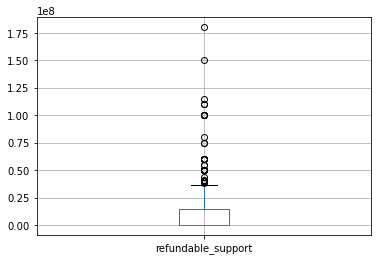

In [41]:
data.boxplot('refundable_support');

В столбце "объем возвратных средств" диапазон нормальных значнний невелик, а медиана равна 0. Это потому, что большая часть фильмов не получает поддержку в таком виде

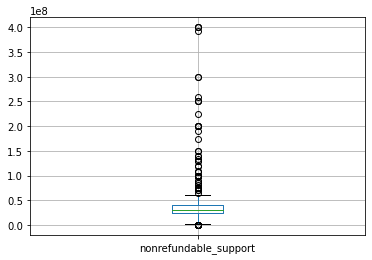

In [42]:
data.boxplot('nonrefundable_support');

В столбце "объем невовзвратных средств" также маленький диапазон нормальных значений, в сравнении с общим числом

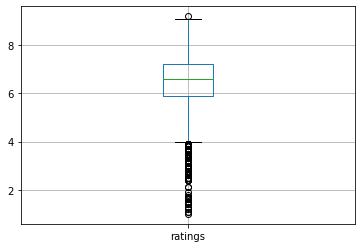

In [43]:
data.boxplot('ratings');

Нормальные значения для рейтинга лежат в диапазоне 4-9. Много аномально низких значений.

Несмотря на то, что в столбцах со средствами господдержкой и рейтингом есть большое число выбросов, мне не кажется это аномалией. Да, они не входят в диапазон нормальных значений, но на мой взглд это такие категории, где такая разница в значениях допустима. Не думаю, что от значений вне нормального диапазона нужно избавляться

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [44]:
data['year_show_start'] = pd.DatetimeIndex(data['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [45]:
def first_mean(column):
    result = column.split(',')[0]
    return result    

In [46]:
data['first_director'] = data['director'].apply(first_mean)
data['main_genre'] = data['genres'].apply(first_mean)

In [47]:
data.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,first_director,main_genre
3132,Зачетный препод 2,121001116,2016-01-14 12:00:00+00:00,Художественный,Константин Филм Интернейшнл,Германия,Бора Дагтекин,"Бора Дагтекин, Лена Олбрич, Сьюзанн Функе",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.60,комедия,"22,021,383.71",2016,Бора Дагтекин,комедия
1605,Тайна четырех принцесс,111005714,2014-05-26 12:00:00+00:00,Художественный,"ООО ""Каро Продакшн""",Россия,О.Штром,"Ю.Обухов, А.Рязанцев",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.80,"комедия,фэнтези","108,910.00",2014,О.Штром,комедия
4476,Покаяние_,212010510,2010-03-31 12:00:00+00:00,Художественный,"НП ""Ателье-Фильм-Александр""",Россия,А.Гутман,А.Гутман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"драма,комедия",NaN,2010,А.Гутман,драма
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,NaN,2012,Роб Маршалл,неизвестно
3817,Любовь в большом городе 2,111001810,2010-02-16 12:00:00+00:00,Художественный,"ООО ""Камера Обскура"" по заказу ООО ""Леополис""",Россия,М.Вайсберг,"С.Ливнев, Г.Малков, Л.Николау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,фэнтези","1,020.00",2010,М.Вайсберг,комедия


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [48]:
data['share_of_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [49]:
data['share_of_support'].median()

0.6140376284219444

В среднем доля гос.поддержки в общем бюджете фильма составляет 60%

В ходе предобработки данных, мы столкнулись с такими проблема, как несоответствие типов данных столбцов значениям в них, наличие пропусков, заполнить которые не представляется возможным, наличие небольшого числа дубликатов, чья причина появления не понятна, неполнота информации о бюджете фильмов, ошибки в оформлении столбцов с категориальными значениями. Выявленные проблемы по возможности были исправлены

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [50]:
title_year_stat = data.groupby('year_show_start')[['title', 'box_office']].count()
title_year_stat['rate'] = title_year_stat['box_office'] / title_year_stat['title']
title_year_stat

,title,box_office,rate
year_show_start,,,
2010,984,105,0.11
2011,622,109,0.18
2012,593,128,0.22
2013,630,184,0.29
2014,807,279,0.35
2015,705,465,0.66
2016,818,526,0.64
2017,505,357,0.71
2018,891,475,0.53


Видно, что с каждым годом число фильмов, выходивших в прокат в кинотеатрах в России до 2017 увеличивалась, а после - снизилось. Причем кол-во фильмов, выходивших в прокат вообще, продолжало расти

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

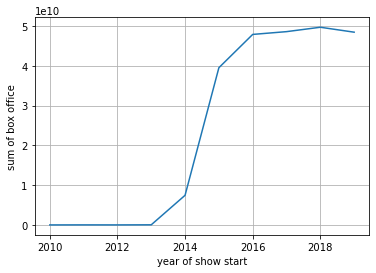

In [51]:
cinema_group = data.groupby('year_show_start')['box_office'].sum()
cinema_group.plot(x='year_show_start', y='box_office', grid=True)
plt.xlabel('year of show start')
plt.ylabel('sum of box office');

Минимальной сумма сборов была в 2010 году, а максимальной - в 2018г. Такие значения также обьясняются неправдоподобно низкими значениями для некоторых фильмов (сборы меньше 10000 рублей). Вероятно, это ошибочные данные, но исправить их не получится, а удаление из анализа не особо изменит ситуацию

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

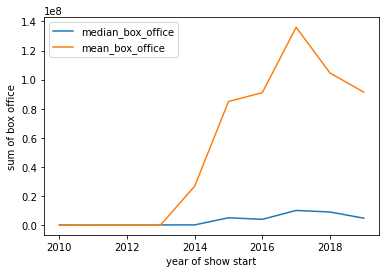

In [52]:
cinema_pivot = (
    data.pivot_table(index='year_show_start', values='box_office', aggfunc=['median', 'mean'])
    .reset_index()
)
cinema_pivot.columns = ['year_show_start','median_box_office', 'mean_box_office']
cinema_pivot.plot(x='year_show_start', y=['median_box_office', 'mean_box_office'])
cinema_pivot
plt.xlabel('year of show start')
plt.ylabel('sum of box office');

Такое большое отличие медианы и среднего объясняется тем, что в таблице есть подозрительно низкие значения кассовых сборов. Средние значения кассовых сборов превышают медианные, особенно это заметно с 2010 до 2015 года. Также несмотря на ежегодно растущую сумму сборов и то, что с 2016 года эти суммы росли уже не так резко, а небольшой спад был в 2018 году, графики средних и медианных значений указывают на спад с 2017 года. с 2017 года и доля фильмов, выходивших в прокат, также уменьшалась. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [53]:
cinema_age =  data.pivot_table(index=['year_show_start', 'age_restriction'], values='box_office', aggfunc=['sum','count']).reset_index()
cinema_age.columns = ['year', 'age','sum', 'count']
cinema_age

,year,age,sum,count
0,2010,«0+» - для любой зрительской аудитории,"1,887,611.00",22
1,2010,«12+» - для детей старше 12 лет,"120,146.00",17
2,2010,«16+» - для детей старше 16 лет,"366,512.00",58
3,2010,«18+» - запрещено для детей,"54,385.00",8
4,2011,«0+» - для любой зрительской аудитории,"13,499,871.00",30
5,2011,«12+» - для детей старше 12 лет,"219,891.00",22
6,2011,«16+» - для детей старше 16 лет,"381,513.00",54
7,2011,«18+» - запрещено для детей,"1,040.00",2
8,2011,«6+» - для детей старше 6 лет,450.00,1
9,2012,«0+» - для любой зрительской аудитории,"2,266,483.00",30


In [54]:
new_c_age = cinema_age.query('year>= 2015')
new_c_age

,year,age,sum,count
24,2015,«0+» - для любой зрительской аудитории,"379,054,578.37",39
25,2015,«12+» - для детей старше 12 лет,"13,616,082,008.91",73
26,2015,«16+» - для детей старше 16 лет,"11,368,120,870.27",168
27,2015,«18+» - запрещено для детей,"5,432,308,367.44",132
28,2015,«6+» - для детей старше 6 лет,"8,701,799,371.41",53
29,2016,«0+» - для любой зрительской аудитории,"150,228,848.67",41
30,2016,«12+» - для детей старше 12 лет,"12,204,446,524.39",82
31,2016,«16+» - для детей старше 16 лет,"16,664,548,541.74",182
32,2016,«18+» - запрещено для детей,"6,793,929,818.87",151
33,2016,«6+» - для детей старше 6 лет,"12,053,146,008.24",70


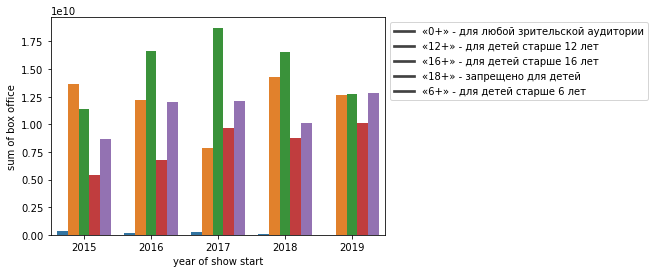

In [55]:
sb.barplot(data = new_c_age, x='year', y='sum', hue='age')
plt.legend(labels = ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', 
'«18+» - запрещено для детей', '«6+» - для детей старше 6 лет'], bbox_to_anchor = (1,1))
plt.xlabel('year of show start')
plt.ylabel('sum of box office');

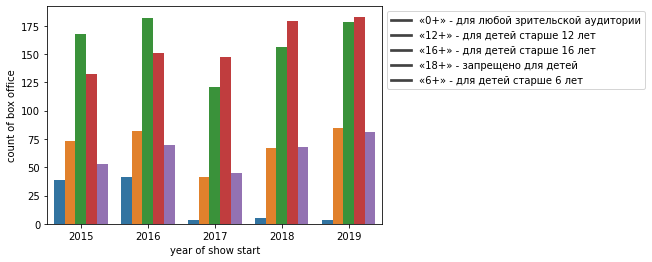

In [56]:
sb.barplot(data = new_c_age, x='year', y='count', hue='age')
plt.legend(labels = ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', 
'«18+» - запрещено для детей', '«6+» - для детей старше 6 лет'], bbox_to_anchor = (1,1))
plt.xlabel('year of show start')
plt.ylabel('count of box office');

Как видно из графика, меньше всего сборов у фильмов 0+, но их и меньше всего среди остальных фильмов. Больше всего сборов у фильмов с ограничением 16+ - эта тенденция сохраняется на протяжении нескольких лет, при этом их выпускается достаточно много. При этом фильмов с рейтингом 18+ выпускается столько же много, но по сборам они на 4ом месте среди всех рейтингов.  

Можно сказать, что такие высокие сборы фильмов 16+ в первую очередь обусловлены из количеством. Фильмы этой категории доступны большей аудитории, чем фильмы 18+. Вероятно, с таким рейтингом выходит большое число фильмов, которые пользуются спросом, расчитаны на большое число зрителей (массовое), н-р Мстители и т.п.
Фильмы 18+ собирают меньше денег, потому что, у них, естественно, меньше ЦА и также, есть теория, что возрастные ограничения увеличивают стоимость билета, что уже может повлиять на выбор фильма,а фильмы с ограниченной аудиторией быстрее теряют кассовые сборы. Также в этой категории могут выходить фильмы "не для всех".

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Изучим фильмы, произведенные в России**

In [57]:
rus = data[data['production_country'] == 'Россия']
rus

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,first_director,main_genre,share_of_support
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.10,"драма,комедия,приключения",360.00,2014,И.Зайцев,драма,NaN
462,Август. Восьмого,111000612,2012-02-07 12:00:00+00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"драма,военный","6,775.00",2012,Д.Файзиев,драма,NaN
463,Тот еще...!,111001612,2012-02-20 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,2.60,"фэнтези,комедия,семейный","12,779.00",2012,С.Андреасян,фэнтези,NaN
464,КОКОКО,111003112,2012-06-05 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.90,"драма,комедия",200.00,2012,А.Смирнова,драма,NaN
469,Разговор,111000712,2012-02-07 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"триллер,драма,детектив",NaN,2012,В.Иванов,триллер,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7475,Папа,111022919,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.20,драма,NaN,2019,К.Чувикова,драма,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,0.67


Всего в таблице 1821 фильм, снятый в России

In [58]:
rus['ratings'].mean()

6.1071931196247125

Средняя оценка фильмов России 6,1

In [59]:
rus['main_genre'].value_counts()

неизвестно         530
драма              364
комедия            248
мультфильм         105
мелодрама           83
триллер             81
боевик              62
фэнтези             48
фантастика          48
ужасы               47
документальный      30
детский             26
детектив            22
военный             21
семейный            20
приключения         17
история             14
биография           11
аниме               10
мюзикл              10
криминал             9
короткометражка      7
спорт                6
вестерн              1
реальное ТВ          1
Name: main_genre, dtype: int64

Преобладающие жанры - драма и комедия, но очень много фильмов с жанром "неизвестно". Посмотрим на них в динамике

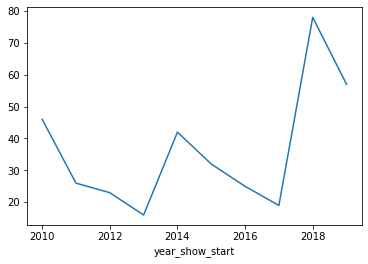

In [60]:
drama = rus[rus['main_genre'] == 'драма']
drama.groupby('year_show_start')['main_genre'].count().plot();

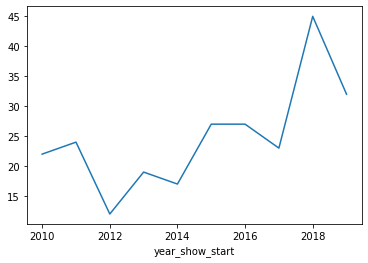

In [61]:
comedy = rus[rus['main_genre'] == 'комедия']
comedy.groupby('year_show_start')['main_genre'].count().plot();

Драмы, как и комедии, из года в год снимаются неравномерно, то есть где-то сильно больше, где-то меньше. Можно заметить, что есть легкая взаимосвязь: в годы, когда больше комедий, выходит меньше драм. Но в обоих случаях пик по количеству фильмов пришелся на 2018 год, а после него произошел спад

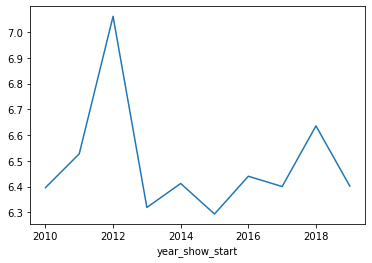

In [62]:
drama_rat = rus[rus['main_genre'] == 'драма']
drama.groupby('year_show_start')['ratings'].mean().plot();

Средняя оценка фильмов в жанре драмы +- постоянна, из года в год колеблется от 6.3 до 6.6. Наибольшее значение было в 2012 - более 7.

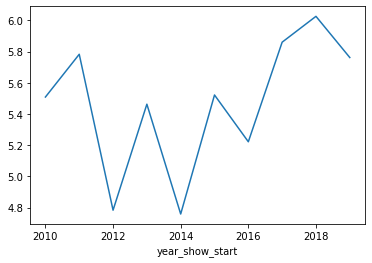

In [63]:
comedy_rat = rus[rus['main_genre'] == 'комедия']
comedy.groupby('year_show_start')['ratings'].mean().plot();

Комедии оцениваются очень неоднозначно и ежегодно средняя оценка сильно колеблется от 4.8 до 5.8. с 2016 года несколько лет средняя оценка росла, но, с 2018 снова упала.

Посмотрим на сумму сборов по годам и жанрам. 

In [64]:
rus_pt = rus.pivot_table(index='main_genre', columns='year_show_start', values='box_office', aggfunc='sum')
rus_pt

year_show_start,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
main_genre,,,,,,,,,,
аниме,0.00,NaN,0.00,NaN,"241,140.00",NaN,NaN,NaN,0.00,0.00
биография,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,"91,500,811.81","114,090,162.74"
боевик,"7,835.00","12,616.00","1,250.00","3,075.00","70,752,891.20","229,584,365.70","198,140,642.94","802,765.00","151,454,254.70","18,232,277.12"
вестерн,NaN,NaN,NaN,"22,480.00",NaN,NaN,NaN,NaN,NaN,NaN
военный,"32,175.00",NaN,NaN,"45,075.00","4,050.00","35,300,095.61","363,622,804.90","8,667,192.00","564,508,861.80","281,553,186.66"
детектив,NaN,NaN,NaN,0.00,380.00,"72,618,367.40",NaN,NaN,"912,217,276.27","57,503,776.40"
детский,"39,968.00","76,466.00","141,990.00","65,335.00","347,129.00","1,038,520.00","2,434,708.00",0.00,0.00,NaN
документальный,0.00,0.00,0.00,NaN,0.00,NaN,"1,361,858.50",0.00,"5,008,915.52","28,151,138.82"
драма,"29,729.00","21,195.00","166,213.00","506,742.60","96,014,119.10","1,252,266,511.00","2,461,676,474.49","1,166,938,501.54","3,917,237,019.99","1,174,169,625.11"


Из таблицы видно, что, во-первых, сравнивая с, например, 2010-2011 годами, в прокат стало выходить больше жанров. Во-вторых, "самыми собираемыми" за последние несколько лет являются фильмы в жанрах драма и комедия, что объсняется их количеством среди всей массф фильмов, а также фильмы - мультфильмы и военные.

**Изучим фильмы, получившие гос.поддержку.**

Мы уже знаем, что всего фильмов с господдержкой 332. Это составляет примерно 18% от общего числа фильмов, снятых в России.

Посмотрим, какую долю из выделяемых государством средств составляют возвратные средства

In [65]:
support_cinema = data.query('budget >= 0')
ref = support_cinema['refundable_support'].sum()
nonref = support_cinema['nonrefundable_support'].sum()
ref/(ref+nonref)

0.1949933556303663

19% - доля вовзратных средств из всех выделенных средств. Значит, аж 81% выделяются на безвозмездной основе. Посмотрим, окупаются ли эти фильмы и их рейтинг.

In [66]:
support_cinema[support_cinema['box_office'] >= support_cinema['budget'] * 2]['box_office'].count() 

39

In [67]:
len(support_cinema[support_cinema['box_office'] <= support_cinema['budget']])

239

Фильм считается окупившимся, если его сборы хотя бы вдвое превысили бюджет. Около 12% фильмов, получивших гос.поддержку окупились. 71% фильмов собрали меньше или столько же денег, сколько на них затратили

In [68]:
rating = support_cinema.pivot_table(index=['year_show_start', 'age_restriction'], values='ratings', aggfunc=['mean', 'count'])
rating

mean   count
                                                       ratings ratings
year_show_start age_restriction                                       
2013            «12+» - для детей старше 12 лет           5.30       1
                «16+» - для детей старше 16 лет           8.10       1
2014            «0+» - для любой зрительской аудитории    5.15       2
                «12+» - для детей старше 12 лет           6.25       4
                «16+» - для детей старше 16 лет           6.10       6
                «18+» - запрещено для детей               6.60       2
                «6+» - для детей старше 6 лет             5.00       1
2015            «0+» - для любой зрительской аудитории    6.70       1
                «12+» - для детей старше 12 лет           6.41      24
                «16+» - для детей старше 16 лет           5.82      37
                «18+» - запрещено для детей               6.10       4
                «6+» - для детей старше 6 лет             6.06      15
2016            «0+» - для любой зрительской аудитории    7.00       1
                «12+» - для детей старше 12 лет           5.66      22
                «16+» - для детей старше 16 лет           5.99      20
                «18+» - запрещено для детей               5.67       3
                «6+» - для детей старше 6 лет             5.04      11
2017            «0+» - для любой зрительской аудитории    6.45       2
                «12+» - для детей старше 12 лет           5.83      15
                «16+» - для детей старше 16 лет           6.00      10
                «18+» - запрещено для детей               6.67       3
                «6+» - для детей старше 6 лет             5.96       9
2018            «12+» - для детей старше 12 лет           6.01      16
                «16+» - для детей старше 16 лет           5.92      19
                «18+» - запрещено для детей               6.58       9
                «6+» - для детей старше 6 лет             5.59       9
2019            «0+» - для любой зрительской аудитории    8.00       1
                «12+» - для детей старше 12 лет           6.24      17
                «16+» - для детей старше 16 лет           5.89      27
                «18+» - запрещено для детей               5.82       5
                «6+» - для детей старше 6 лет             6.56      17

In [69]:
support_cinema['ratings'].mean()

6.000636942675162

In [70]:
data['ratings'].mean()

6.479195561719828

Рейтинг у фильмов получивших гос.поддержку в разрезе по годам и возрастным категориям в среднем составляет 6.0, что не намного меньше среднего рейтинга фильмов по России в целом (6,1)? также это меньше среднего рейтинга таблицы (6,4). Видно, что есть несколько фильмов, получивших оценку сильно выше средней. 

In [71]:
support_cinema['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

Среди фильмов, получающих господдержку, большую часть составляют фильмы 12+ и 16+. Возможно, больший упор делается на семейные фильмы и фильмы для детей. 

In [72]:
support_cinema['main_genre'].value_counts()

драма          93
комедия        74
мультфильм     31
неизвестно     16
триллер        15
мелодрама      15
фэнтези        11
фантастика     11
ужасы          10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
детский         4
мюзикл          4
история         4
криминал        3
биография       3
спорт           3
реальное ТВ     1
Name: main_genre, dtype: int64

Господдержку в основном получают фильмы в тех же жанрах, что и распространены в России в целом: драма и комедия.

In [73]:
support_cinema.pivot_table(index='main_genre', values='ratings', aggfunc=['mean'])

,mean
,ratings
main_genre,
биография,6.90
боевик,6.58
военный,6.47
детектив,6.76
детский,7.12
драма,6.39
история,5.35
комедия,5.51


Если посмотреть на рейтинги фильмов по жанрам, то можно увидеть, что фильмы в жанрах, на которые чаще всего выделяют деньги, зрителями воспринимаются не очень хорошо (у комедий средняя оценка 5,5)

Таким образом, судя по имеющимся данным, государство оказывает поддержку около 20 % фильмам. Из выделяемых на это средств 80% являются безвозратными. При этом, 71% фильм, получивших поддержку, не окупились. Наиболее часто в России снимают комедии и драмы, они же и собирают больше всех, среди других жанров. Средний рейтинг россиийских фильм около 6, что немного ниже среднего рейтинга по таблице в целом. Комедии воспринимаются населением неоднозначно, их оценки непостоянны. В основном фильмы расчитаны на аудиторию 12 и 16+.

### Шаг 5. Напишите общий вывод

В ходе проведенного исследования мы поменяли типы данных в столбцах "show_start_date" и "ratings"; выявили пропуски  и заполнили их там, где это было возможно и необходимо для исследования, а именно в столбцах «director» и «genres». выявили дубликаты, один из которых – опечатка и, соответственно, избавились от него.  Исправили проблемные значения в столбцах, где были допущены лишние символы в названиях категорий. Выявили нулевые значения в столбце «budget», которых там быть не должно и заменили суммой средств господдержки. Создали новые столбцы и выделили год, основной жанр фильма, фамилию главного режиссера и долю господдержки в общем бюджете фильма (в среднем она равна 60%) . Изучили сколько фильмов выходило каждый год и сколько из них, выходило в кинотеатрах (число фильмов, выходивших в прокат росло до 2017. года). Максимальная сумма сборов была в 2018, а минимальная – в 2010. Выявили, что наибольшие сборы у фильмов с рейтингом 16+, эта тенденция сохраняется на протяжении нескольких лет. Изучили фильмы, произведенные в России и отдельно фильмы, получившие господдержку. Выявили, что в России преобладают фильмы таких жанров, как драма и комедия. Фильмы этих же жанров чаще получают господдержку. Рейтинг фильмов России и фильмов с господдержкой примерно одинаков (6-6.1), но это ниже, чем в общей базе данных (6.4). Средние оценки основных жанров фильмов непостоянны и из года в год колеблются, особенно у комедий. Жанры фильмов с наибольшими сборами в течение последних лет – драма, комедия, мультфильм, военный. Также мы выявили, что среди фильмов, получающих господдержку, окупается только 12%. 71% фильмов собирает меньше средств, чем на него затратили. Также в основном господдержку получают фильмы категорий 12 +и 16+. Можно сказать, что больший акцент делается на семейные фильмы. 